In [47]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, correlate2d

Add Gaussian,Reyleigh,Erlang,Exponential,Uniform and Impulse noise into the image and correspoinding their histogram

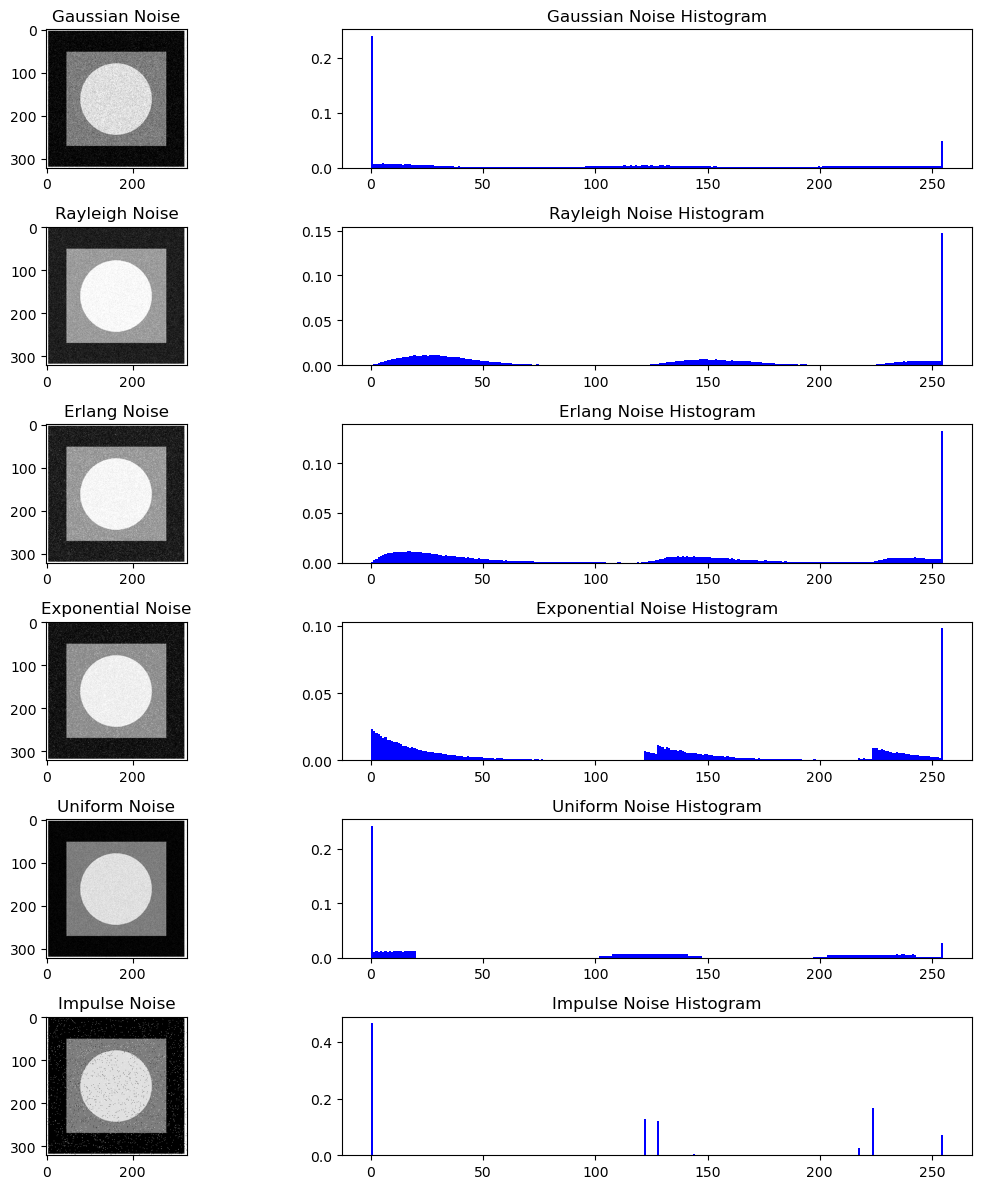

In [48]:
image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)

def add_gaussian_noise(image, mean=0, std=25):
    gauss = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy = cv2.add(image.astype(np.float32), gauss)
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_rayleigh_noise(image, scale=25):
    rayleigh = np.random.rayleigh(scale, image.shape).astype(np.float32)
    noisy = cv2.add(image.astype(np.float32), rayleigh)
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_erlang_noise(image, shape=2, scale=15):
    erlang = np.random.gamma(shape, scale, image.shape).astype(np.float32)
    noisy = cv2.add(image.astype(np.float32), erlang)
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_exponential_noise(image, scale=20):
    exponential = np.random.exponential(scale, image.shape).astype(np.float32)
    noisy = cv2.add(image.astype(np.float32), exponential)
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_uniform_noise(image, low=-20, high=20):
    uniform = np.random.uniform(low, high, image.shape).astype(np.float32)
    noisy = cv2.add(image.astype(np.float32), uniform)
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_impulse_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[pepper_coords[0], pepper_coords[1]] = 0

    return noisy

noisy_images = {
    "Gaussian Noise": add_gaussian_noise(image),
    "Rayleigh Noise": add_rayleigh_noise(image),
    "Erlang Noise": add_erlang_noise(image),
    "Exponential Noise": add_exponential_noise(image),
    "Uniform Noise": add_uniform_noise(image),
    "Impulse Noise": add_impulse_noise(image)
}

plt.figure(figsize=(12, 12))

for i, (name, noisy_img) in enumerate(noisy_images.items()):
    plt.subplot(6, 2, 2 * i + 1), plt.imshow(noisy_img, cmap='gray'), plt.title(name)
    plt.subplot(6, 2, 2 * i + 2), plt.hist(noisy_img.ravel(), bins=256, range=(0, 255), density=True, color='blue'), plt.title(f"{name} Histogram")

plt.tight_layout()
plt.show()


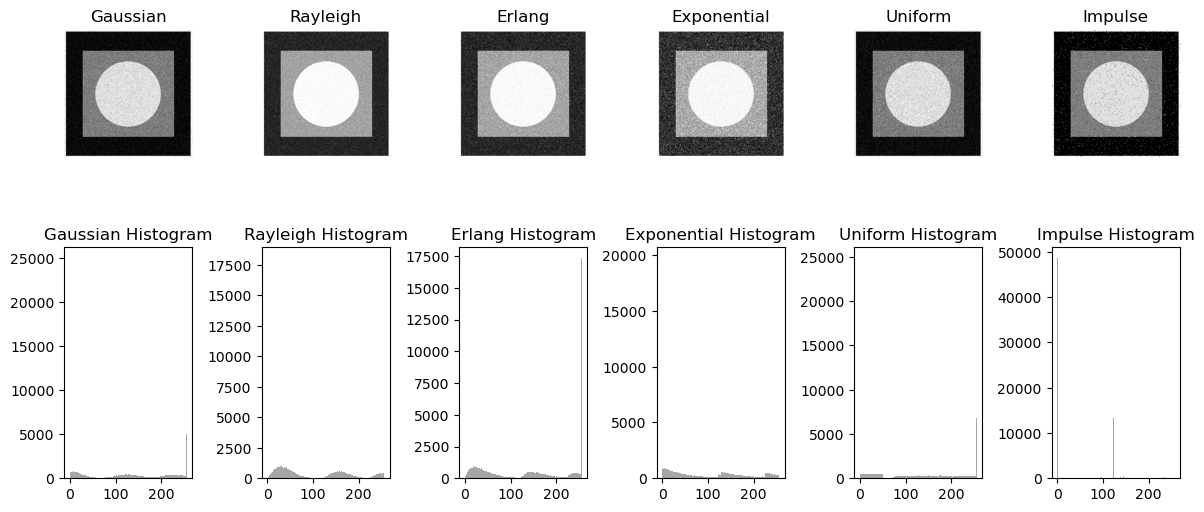

In [49]:

image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)

# Function to add different types of noise
def add_noise(image, noise_type):
    noisy_image = image.copy().astype(np.float32)  # Convert to float for processing
    rows, cols = image.shape

    if noise_type == "gaussian":
        noise = np.random.normal(0, 25, (rows, cols))  # Mean=0, Std=25
        noisy_image += noise

    elif noise_type == "rayleigh":
        noise = np.random.rayleigh(30, (rows, cols))  # Scale=30
        noisy_image += noise

    elif noise_type == "erlang":
        noise = np.random.gamma(shape=2, scale=20, size=(rows, cols))  # Shape=2, Scale=20
        noisy_image += noise

    elif noise_type == "exponential":
        noise = np.random.exponential(50, (rows, cols))  # Lambda=50
        noisy_image += noise

    elif noise_type == "uniform":
        noise = np.random.uniform(-50, 50, (rows, cols))  # Range [-50, 50]
        noisy_image += noise

    elif noise_type == "impulse":  # Salt & Pepper
        salt_prob, pepper_prob = 0.02, 0.02  # 2% noise
        salt = np.random.rand(rows, cols) < salt_prob
        pepper = np.random.rand(rows, cols) < pepper_prob
        noisy_image[salt] = 255
        noisy_image[pepper] = 0

    # Clip values to be in valid range
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Define noise types
noise_types = ["gaussian", "rayleigh", "erlang", "exponential", "uniform", "impulse"]

# Apply noise and plot images
plt.figure(figsize=(12, 8))
for i, noise_type in enumerate(noise_types):
    noisy_img = add_noise(image, noise_type)

    plt.subplot(3, len(noise_types), i+1)
    plt.imshow(noisy_img, cmap='gray')
    plt.title(noise_type.capitalize())
    plt.axis('off')

    # Plot histogram
    plt.subplot(3, len(noise_types), i+1+len(noise_types))
    plt.hist(noisy_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    plt.title(f"{noise_type.capitalize()} Histogram")

plt.tight_layout()
plt.show()


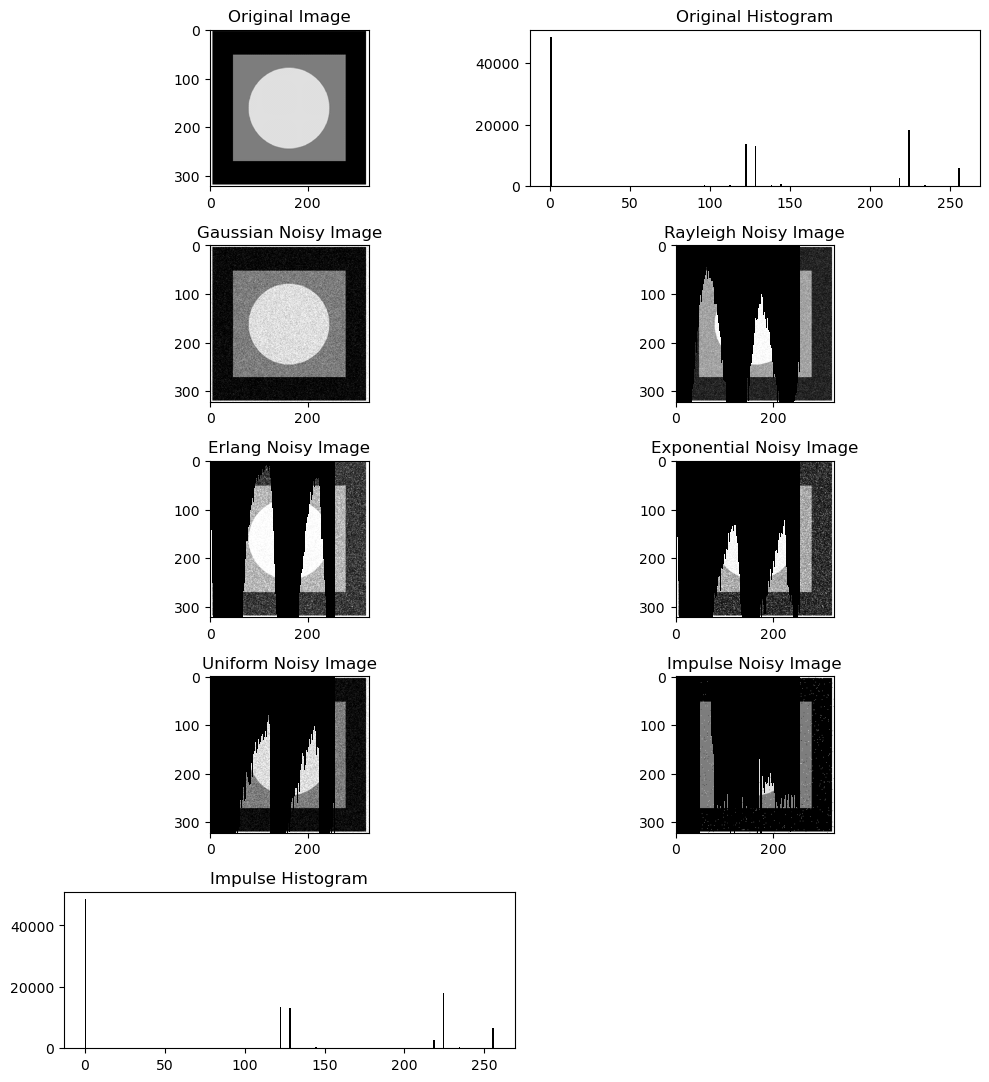

In [50]:
image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

def add_noise(img, noise_type):
    if noise_type == "gaussian":
        mean, stddev = 0, 25 
        noise = np.random.normal(mean, stddev, img.shape)
        
    elif noise_type == "rayleigh":
        scale = 30  
        noise = np.random.rayleigh(scale, img.shape)
        
    elif noise_type == "erlang":
        shape, scale = 2, 30 
        noise = np.random.gamma(shape, scale, img.shape)
        
    elif noise_type == "exponential":
        scale = 50  
        noise = np.random.exponential(scale, img.shape)
        
    elif noise_type == "uniform":
        low, high = -50, 50 
        noise = np.random.uniform(low, high, img.shape)
        
    elif noise_type == "impulse": 
        prob = 0.02  
        noise = np.random.rand(rows, cols)
        img_noisy = np.copy(img)
        img_noisy[noise < prob / 2] = 0 
        img_noisy[noise > 1 - prob / 2] = 255 
        return img_noisy

    noisy_image = img + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

noises = ["gaussian", "rayleigh", "erlang", "exponential", "uniform", "impulse"]
noisy_images = {n: add_noise(image, n) for n in noises}

plt.figure(figsize=(10, 15))
plt.subplot(7, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(7, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title(f"Original Histogram")
for i, (name, img) in enumerate(noisy_images.items(), start=3):
    # plt.subplot(7, 2, i), plt.imshow(img, cmap='gray'), plt.title(name.capitalize() + " Noise")


    plt.subplot(7, 2, i)
    plt.imshow(img, cmap='gray')
    plt.title(f"{name.capitalize()} Noisy Image")
    i=i+1
    # Show histogram
    plt.subplot(7, 2, i)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f"{name.capitalize()} Histogram")
    i=i+1

plt.tight_layout()
plt.show()


Maybe its the correct code

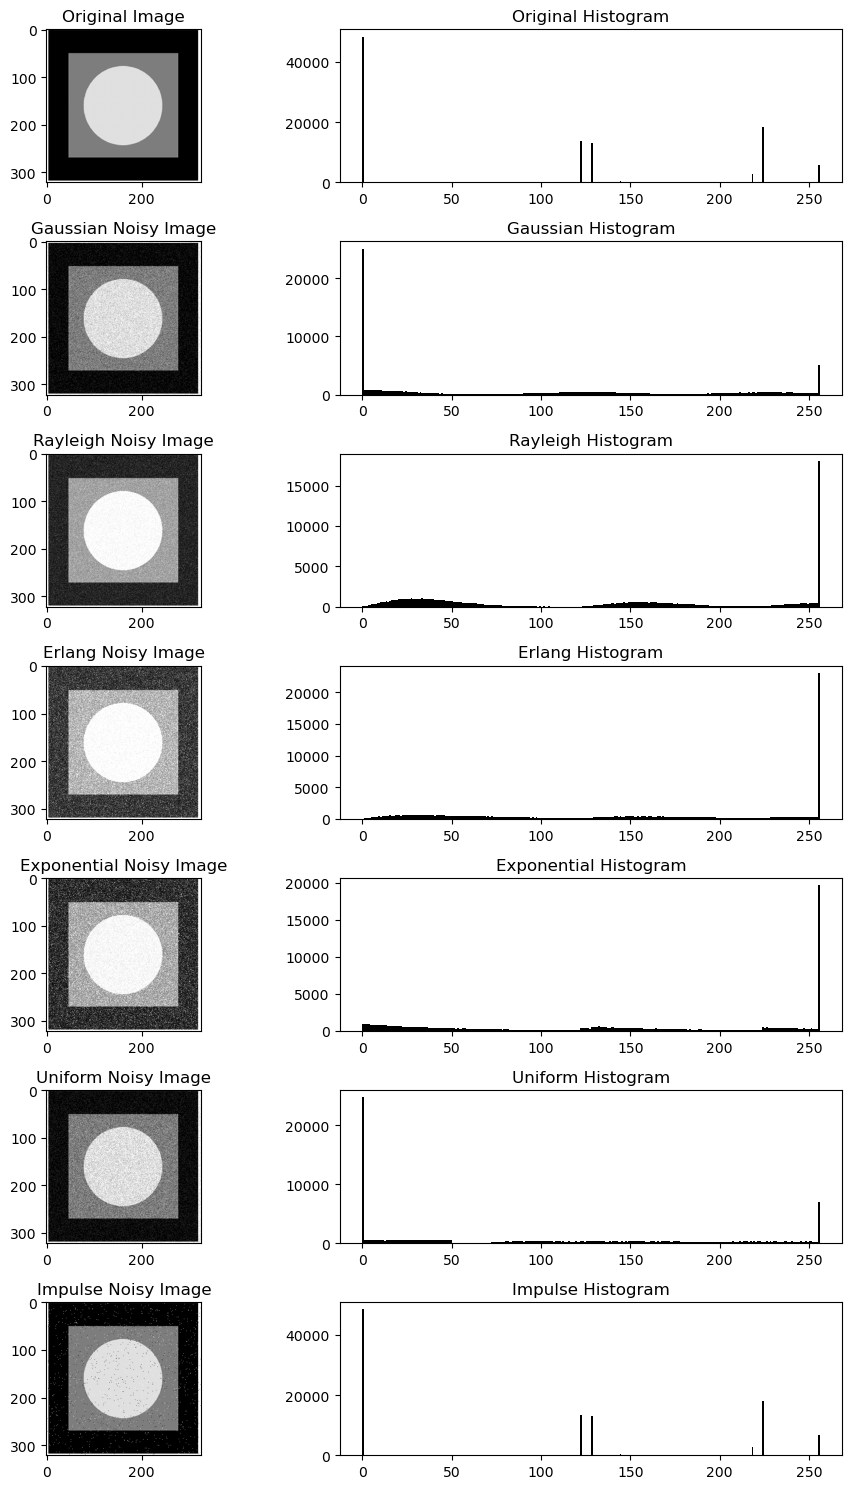

In [51]:
image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

# Function to add noise
def add_noise(img, noise_type):
    if noise_type == "gaussian":
        mean, stddev = 0, 25 
        noise = np.random.normal(mean, stddev, img.shape)
    elif noise_type == "rayleigh":
        scale = 30  
        noise = np.random.rayleigh(scale, img.shape)
    elif noise_type == "erlang":
        shape, scale = 2, 30 
        noise = np.random.gamma(shape, scale, img.shape)
    elif noise_type == "exponential":
        scale = 50  
        noise = np.random.exponential(scale, img.shape)
    elif noise_type == "uniform":
        low, high = -50, 50 
        noise = np.random.uniform(low, high, img.shape)
    elif noise_type == "impulse": 
        prob = 0.02  
        noise = np.random.rand(rows, cols)
        img_noisy = np.copy(img)
        img_noisy[noise < prob / 2] = 0 
        img_noisy[noise > 1 - prob / 2] = 255 
        return img_noisy

    noisy_image = img + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Generate noisy images
noises = ["gaussian", "rayleigh", "erlang", "exponential", "uniform", "impulse"]
noisy_images = {n: add_noise(image, n) for n in noises}

# Create subplots (7 rows, 2 columns: image + histogram)
plt.figure(figsize=(10, 15))

# Plot original image and histogram
plt.subplot(7, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(7, 2, 2), plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Original Histogram")

# Loop through noisy images
for i, (name, img) in enumerate(noisy_images.items()):
    row = i + 2  # Adjust index (starts at 1 for original image)
    
    # Noisy image
    plt.subplot(7, 2, row * 2 - 1)  # 1st column (odd index)
    plt.imshow(img, cmap='gray')
    plt.title(f"{name.capitalize()} Noisy Image")

    # Histogram
    plt.subplot(7, 2, row * 2)  # 2nd column (even index)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f"{name.capitalize()} Histogram")

plt.tight_layout()
plt.show()


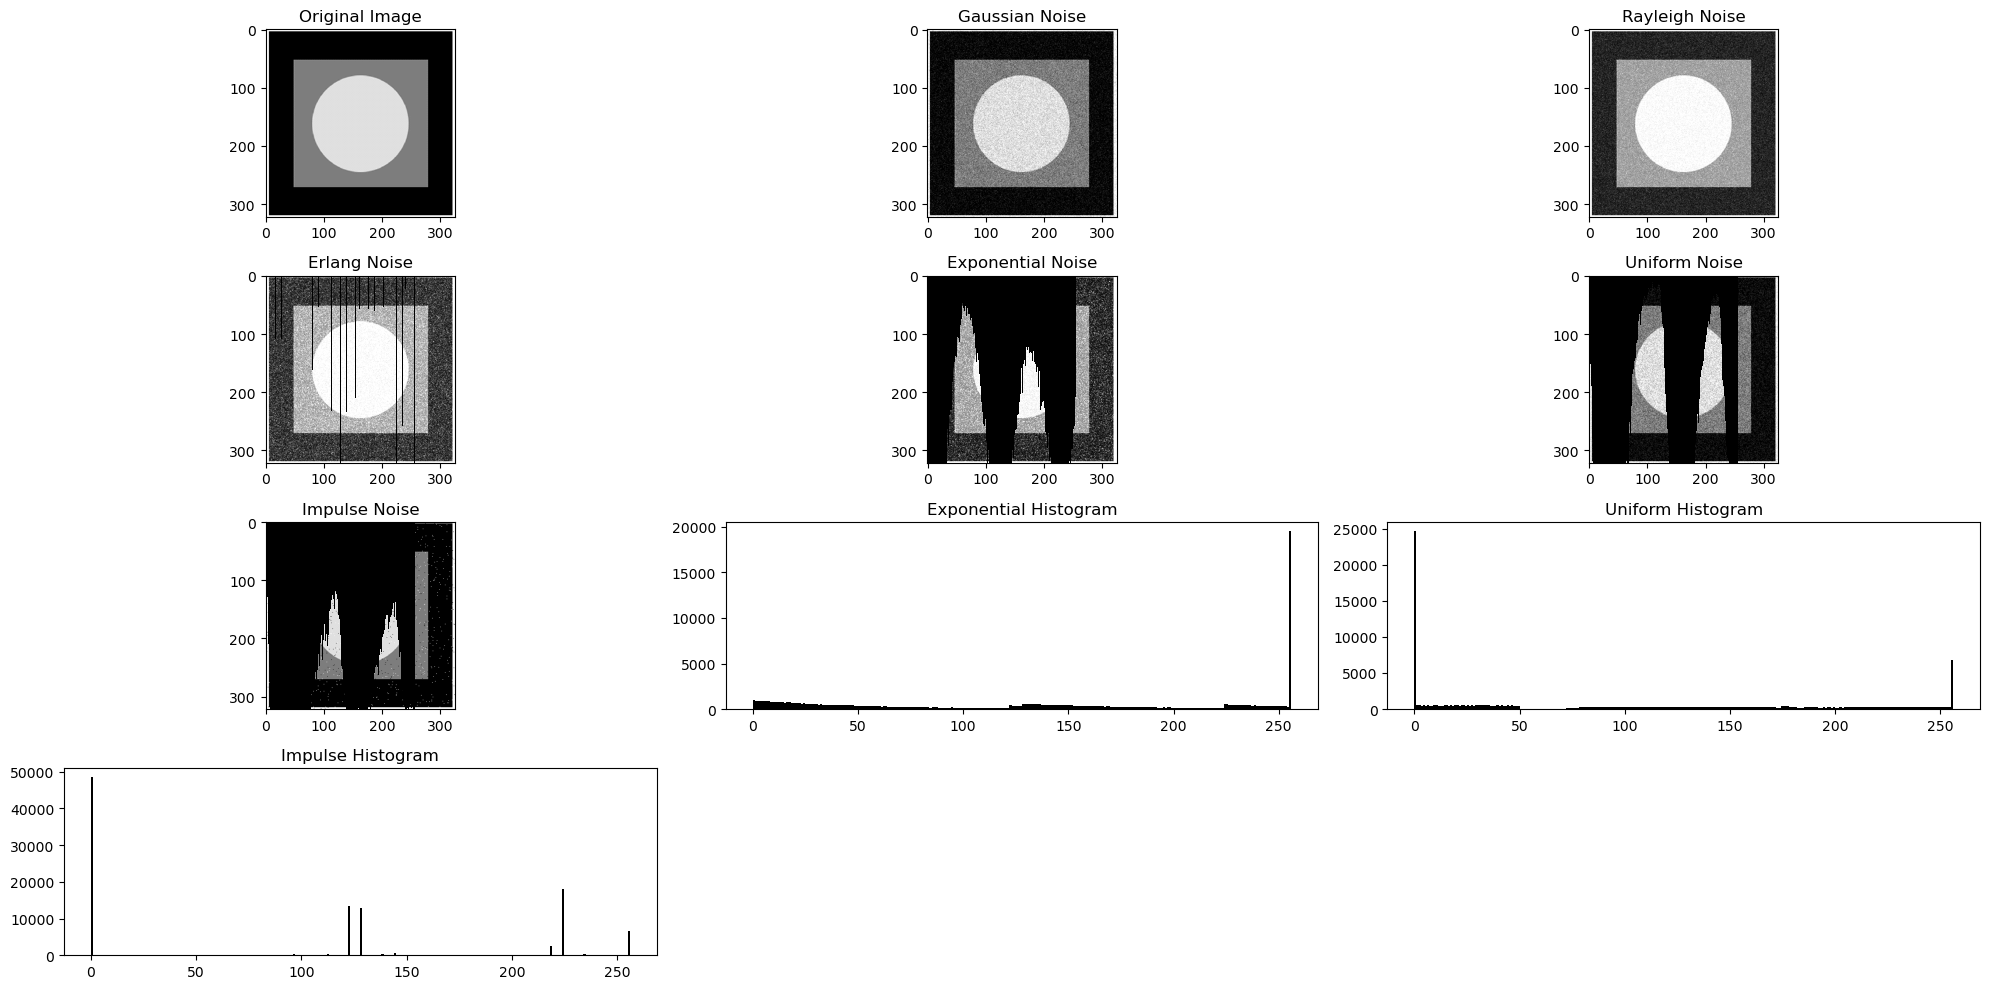

In [43]:

image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

# Function to add noise
def add_noise(img, noise_type):
    if noise_type == "gaussian":
        mean, stddev = 0, 25  # Mean and standard deviation
        noise = np.random.normal(mean, stddev, img.shape)
        
    elif noise_type == "rayleigh":
        scale = 30  # Scale parameter
        noise = np.random.rayleigh(scale, img.shape)
        
    elif noise_type == "erlang":
        shape, scale = 2, 30  # Shape (k) and scale (θ) parameters
        noise = np.random.gamma(shape, scale, img.shape)
        
    elif noise_type == "exponential":
        scale = 50  # Scale parameter
        noise = np.random.exponential(scale, img.shape)
        
    elif noise_type == "uniform":
        low, high = -50, 50  # Range of uniform noise
        noise = np.random.uniform(low, high, img.shape)
        
    elif noise_type == "impulse":  # Salt & Pepper
        prob = 0.02  # Probability of noise
        noise = np.random.rand(rows, cols)
        img_noisy = np.copy(img)
        img_noisy[noise < prob / 2] = 0   # Salt (black)
        img_noisy[noise > 1 - prob / 2] = 255  # Pepper (white)
        return img_noisy

    # Clip values to valid image range
    noisy_image = img + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Generate noisy images
noises = ["gaussian", "rayleigh", "erlang", "exponential", "uniform", "impulse"]
noisy_images = {n: add_noise(image, n) for n in noises}

# Plot images and histograms
plt.figure(figsize=(20, 10))

# Original image
plt.subplot(4, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(4, 3, 4), plt.hist(image.ravel(), bins=256, range=[0, 256], color='black'), plt.title("Histogram")

# Noisy images and histograms
for i, (name, img) in enumerate(noisy_images.items(), start=2):
    plt.subplot(4, 3, i), plt.imshow(img, cmap='gray'), plt.title(name.capitalize() + " Noise")
    plt.subplot(4, 3, i + 3), plt.hist(img.ravel(), bins=256, range=[0, 256], color='black'), plt.title(name.capitalize() + " Histogram")

plt.tight_layout()
plt.show()


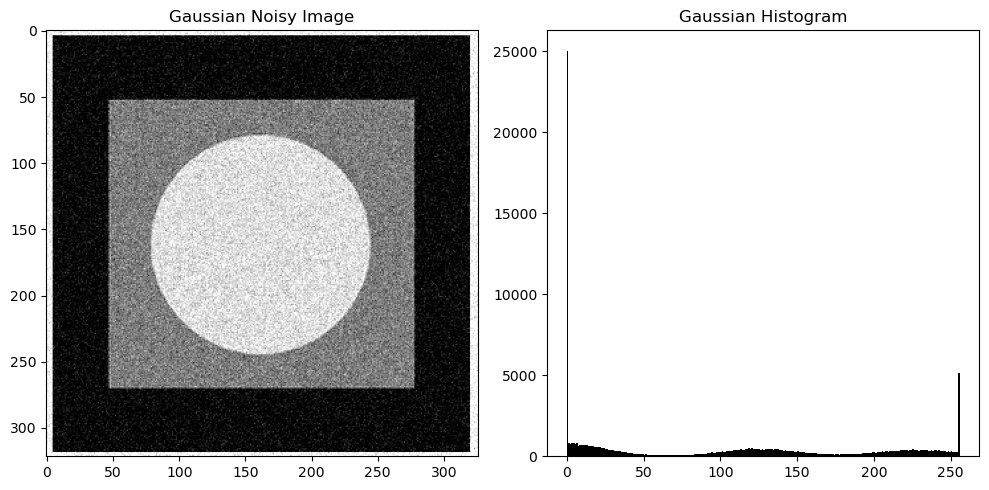

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)

# Function to add noise
def add_noise(img, noise_type):
    rows, cols = img.shape
    if noise_type == "gaussian":
        mean, stddev = 0, 25
        noise = np.random.normal(mean, stddev, img.shape)
    elif noise_type == "rayleigh":
        scale = 30
        noise = np.random.rayleigh(scale, img.shape)
    elif noise_type == "erlang":
        shape, scale = 2, 30
        noise = np.random.gamma(shape, scale, img.shape)
    elif noise_type == "exponential":
        scale = 50
        noise = np.random.exponential(scale, img.shape)
    elif noise_type == "uniform":
        low, high = -50, 50
        noise = np.random.uniform(low, high, img.shape)
    elif noise_type == "impulse":
        prob = 0.02
        noise = np.random.rand(rows, cols)
        img_noisy = np.copy(img)
        img_noisy[noise < prob / 2] = 0
        img_noisy[noise > 1 - prob / 2] = 255
        return img_noisy

    noisy_image = img + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Choose a noise type
noise_type = "gaussian"  # Change this to try other noise types
noisy_img = add_noise(image, noise_type)

# Plot the image and histogram
plt.figure(figsize=(10, 5))

# Show the noisy image
plt.subplot(1, 2, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title(f"{noise_type.capitalize()} Noisy Image")

# Show histogram
plt.subplot(1, 2, 2)
plt.hist(noisy_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title(f"{noise_type.capitalize()} Histogram")

plt.tight_layout()
plt.show()


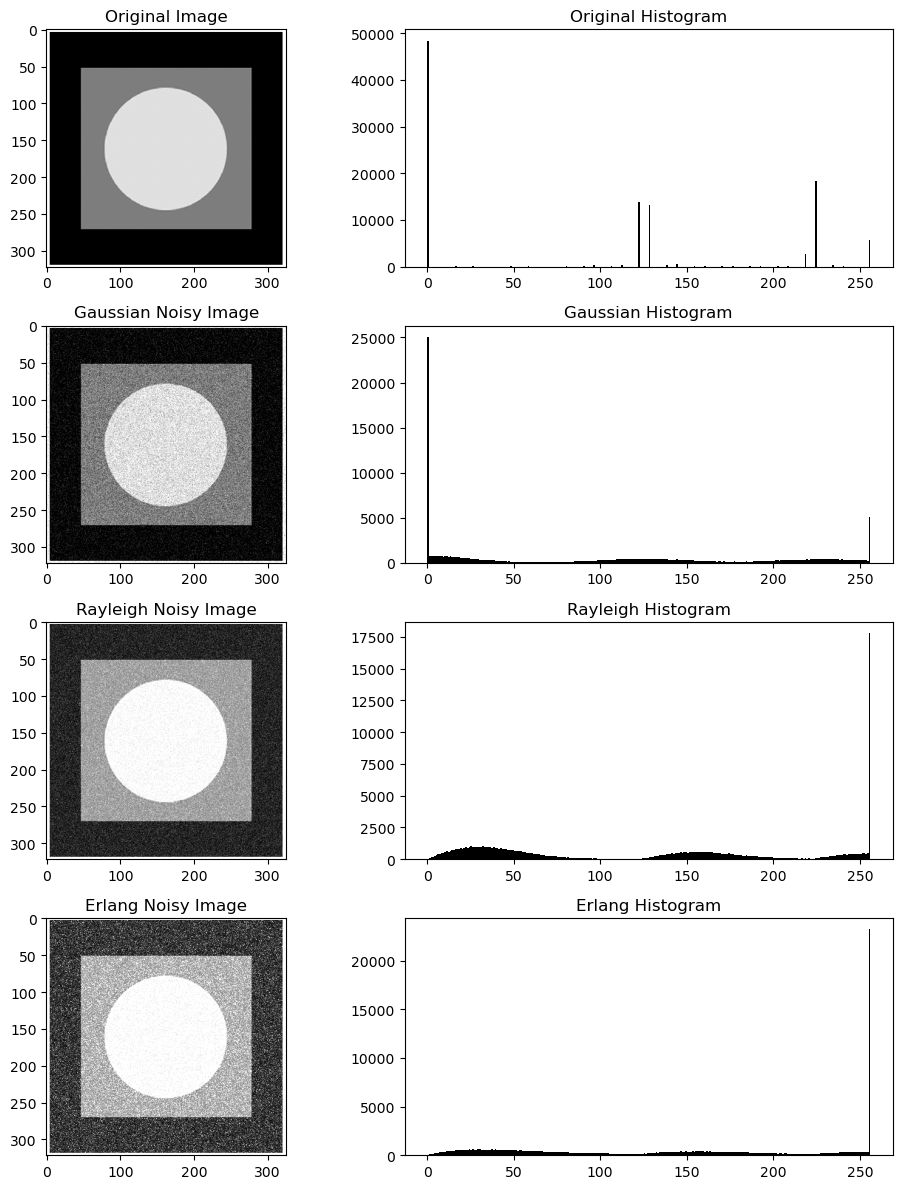

In [45]:
image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)

# Function to add noise
def add_noise(img, noise_type):
    if noise_type == "gaussian":
        mean, stddev = 0, 25  
        noise = np.random.normal(mean, stddev, img.shape)
    elif noise_type == "rayleigh":
        scale = 30  
        noise = np.random.rayleigh(scale, img.shape)
    elif noise_type == "erlang":
        shape, scale = 2, 30  
        noise = np.random.gamma(shape, scale, img.shape)
    else:
        return img  # Return original if noise type is unknown

    noisy_image = img + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Define noise types
noise_types = ["gaussian", "rayleigh", "erlang"]

# Generate noisy images
noisy_images = {n: add_noise(image, n) for n in noise_types}

# Create subplots (4 rows: original + 3 noise types, 2 columns: image + histogram)
plt.figure(figsize=(10, 12))

# Original image and histogram
plt.subplot(4, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(4, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Original Histogram")

# Loop through noisy images
for i, (name, img) in enumerate(noisy_images.items()):
    row = i + 2  # Adjust row index

    # Noisy image
    plt.subplot(4, 2, row * 2 - 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{name.capitalize()} Noisy Image")

    # Histogram
    plt.subplot(4, 2, row * 2)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f"{name.capitalize()} Histogram")

plt.tight_layout()
plt.show()


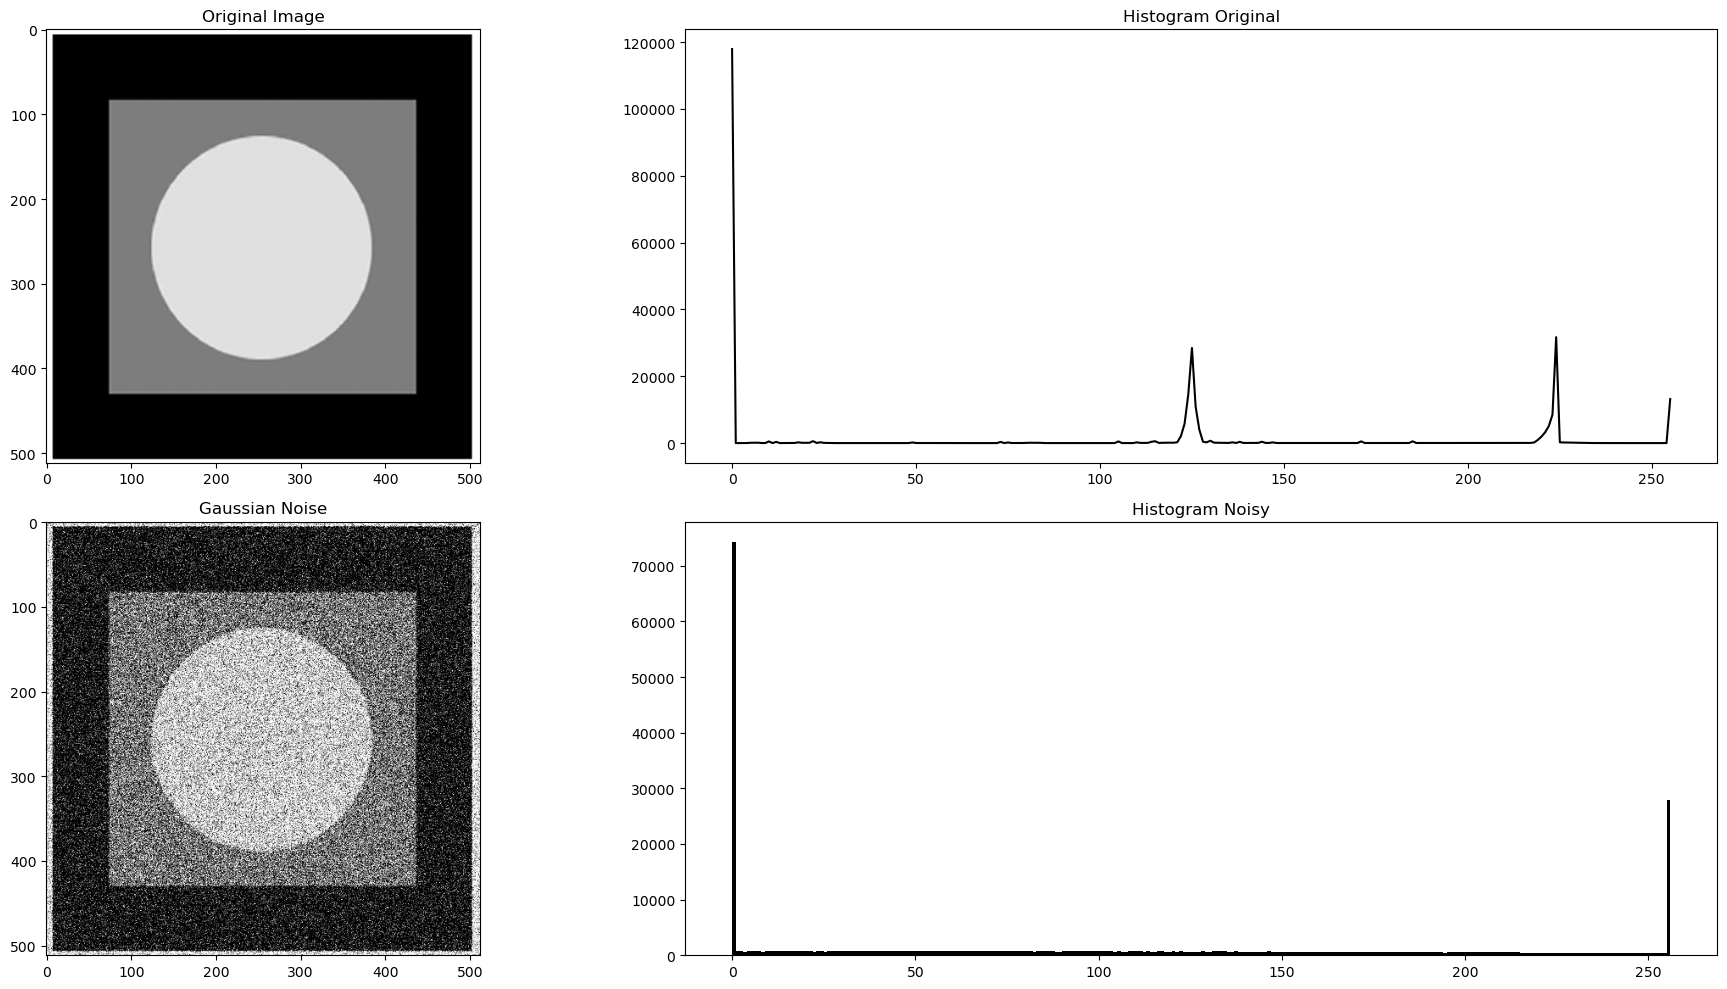

In [54]:
image = cv2.imread("Images/n1.png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))

mean, stddev = -10, 90  
noise = np.random.normal(mean, stddev, image.shape)  
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1),plt.title("Original Image"),plt.imshow(image, cmap='gray')
plt.subplot(2, 2, 2),plt.title("Histogram Original"),plt.plot(cv2.calcHist([image], [0], None, [256], [0, 256]), color='black')
plt.subplot(2, 2, 3),plt.title("Gaussian Noise"),plt.imshow(noisy_image, cmap='gray')
plt.subplot(2, 2, 4),plt.title("Histogram Noisy"),plt.hist(noisy_image.ravel(), bins=256, range=[0, 256], color='black')

plt.tight_layout()
plt.show()
